In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df = pd.read_csv('../nba.csv')
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    float64
 3   Position  457 non-null    object 
 4   Age       457 non-null    float64
 5   Height    457 non-null    object 
 6   Weight    457 non-null    float64
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(4), object(5)
memory usage: 32.3+ KB


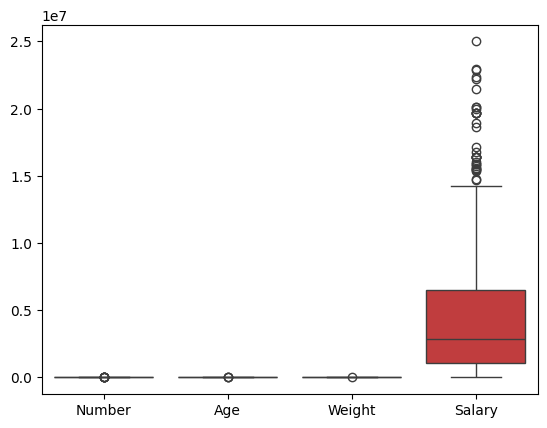

In [57]:
sns.boxplot(df)
plt.show()

In [58]:
df.isnull().sum()

Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary      12
dtype: int64

In [59]:
df['Name'] = df['Name'].fillna(df['Name'][0])
df['Team'] = df['Team'].fillna(df['Team'].mode()[0])
df['Number'] = df['Number'].fillna(df['Number'].mean())
df['Position'] = df['Position'].fillna(df['Position'].mode()[0])
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Height'] = df['Height'].fillna(df['Height'].mode()[0])
df['Weight'] = df['Weight'].fillna(df['Weight'].mean())
df['College'] = df['College'].fillna(df['College'].mode()[0])
df['Salary'] = df['Salary'].fillna(df['Salary'].median())
df.isnull().sum()

Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      0
dtype: int64

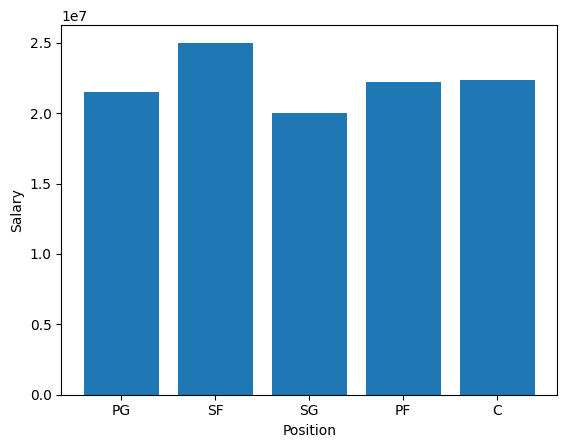

In [105]:
plt.bar(df['Position'], df['Salary'])
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

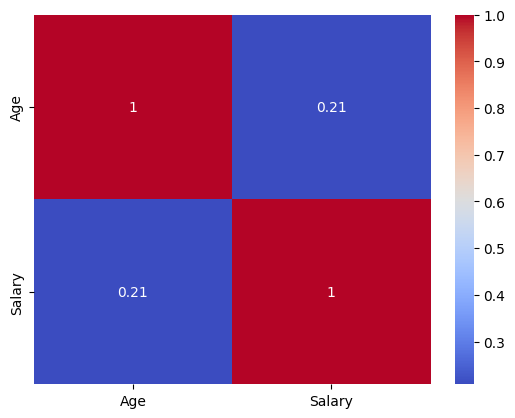

In [109]:
sns.heatmap(df[['Age', 'Salary']].corr(), annot=True, cmap='coolwarm')
plt.show()

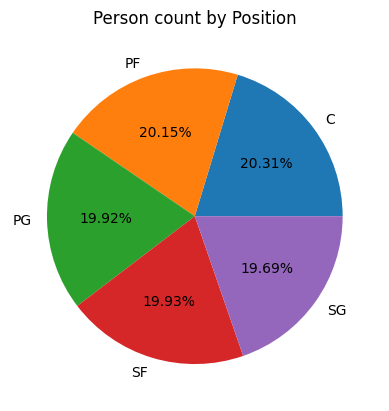

In [110]:
key_list = []
value_list = []
for key, value in df.groupby('Position'):
    key_list.append(key)  
    value_list.append(value['Age'].mean())
plt.pie(value_list, labels=key_list, autopct='%1.2f%%')
plt.title('Person count by Position')
plt.show()